<Axes: xlabel='displ', ylabel='hwy'>

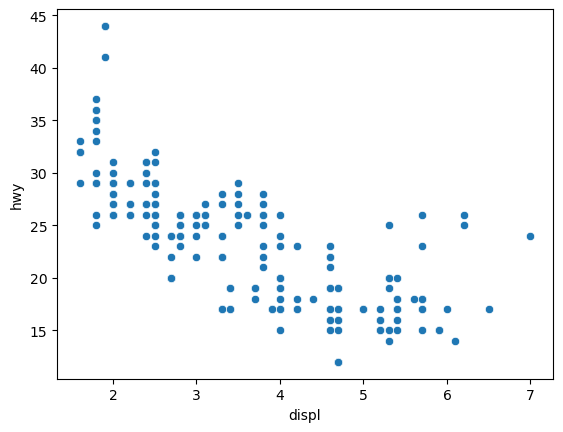

In [3]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('mpg.csv')
sns.scatterplot(data=mpg, x='displ', y='hwy')

In [4]:
# 기말고사
# 그래프를 분석 및 파악하는 문제 출제 가능성 있음
# 색깔 그룹별로 어떤 특징에 따라 어떻게 분포가 돼있는지
# ex) 4륜구동은 연비가 낮아서 낮게 위치되어 있는 등

[(3.0, 6.0)]

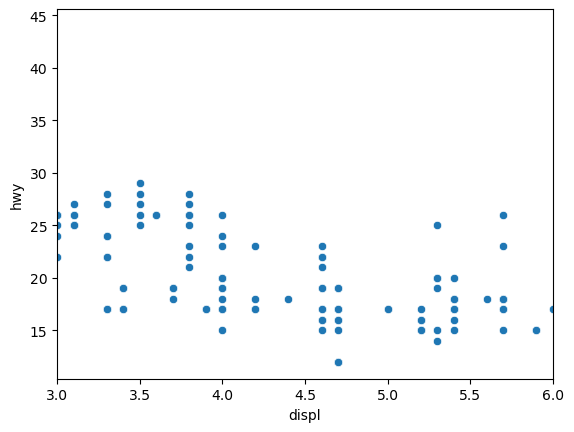

In [6]:
sns.scatterplot(data=mpg,x='displ',y='hwy')\
    .set(xlim = [3,6])
# set 함수로 범위를 3~6 으로 제한    

[(3.0, 6.0), (10.0, 30.0)]

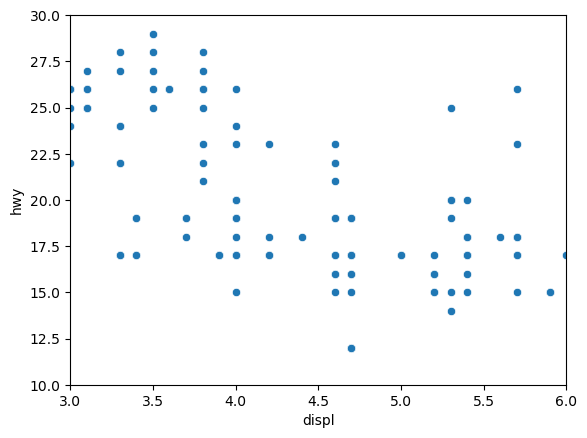

In [8]:
sns.scatterplot(data=mpg, x='displ',y='hwy')\
    .set(xlim = [3,6], ylim = [10,30])
# 마찬가지로 y축 범위도 10~30 으로 제한

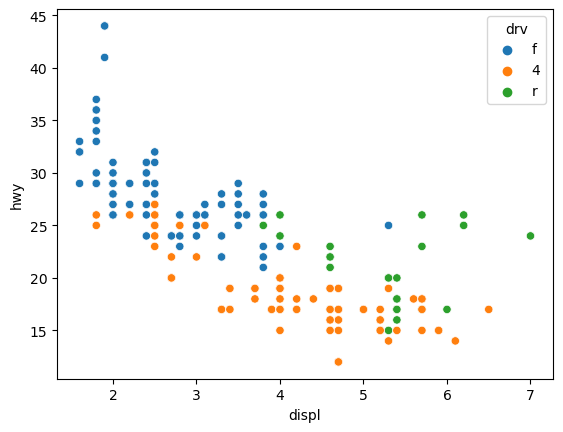

In [11]:
# hue(색상값)을 drv 별로 분리
sns.scatterplot(data=mpg,x='displ',y='hwy',hue='drv'); # 세미콜론 붙이면 그래프 설명 안나옴
# 위에서 말한 기말고사 출제 가능성 높은 문제

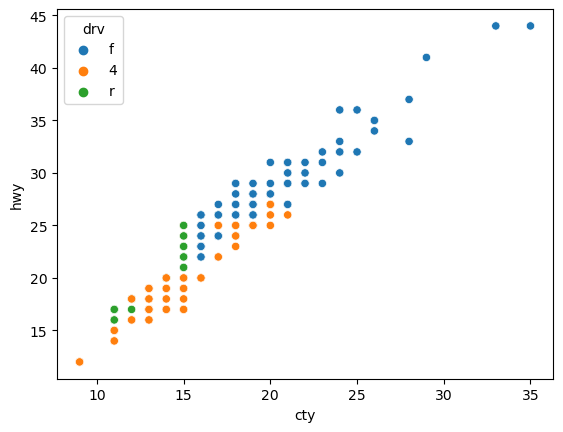

In [15]:
# 7장
# 첫 번째 혼자서 해보기
# Q1
sns.scatterplot(data=mpg, x='cty',y='hwy',hue='drv');

In [18]:
df_mpg = mpg.groupby('drv')\
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [20]:
# as_index = False 로 변수를 인덱스로 바꾸지 않고 행에 유지
df_mpg = mpg.groupby('drv', as_index=False)\
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

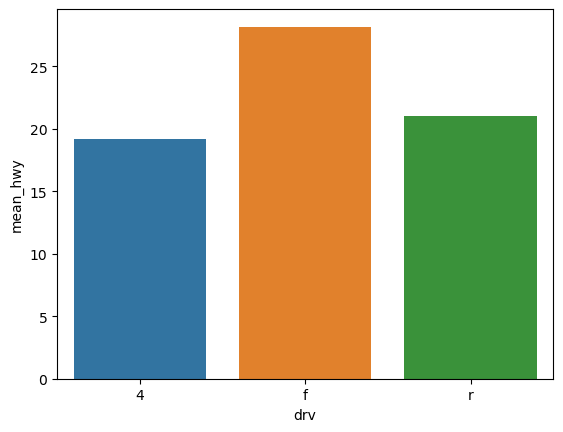

In [23]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

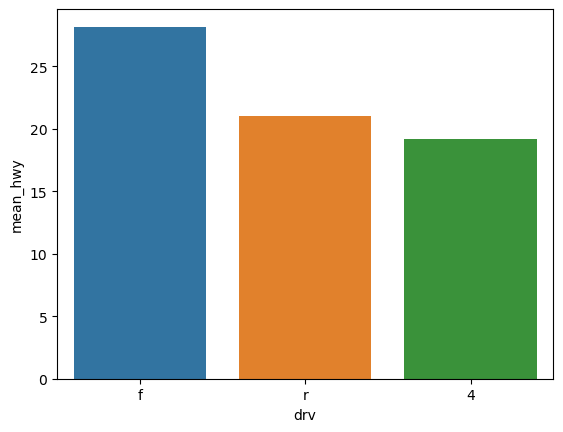

In [26]:
# 크기순으로 데이터 프레임 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)

# 막대 그래프
sns.barplot(data=df_mpg,x='drv',y='mean_hwy')

In [29]:
# 집단별 빈도표
df_mpg = mpg.groupby('drv', as_index=False)\
            .agg(n = ('drv', 'count'))
df_mpg # count 로 집계해서 빈도 비교

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

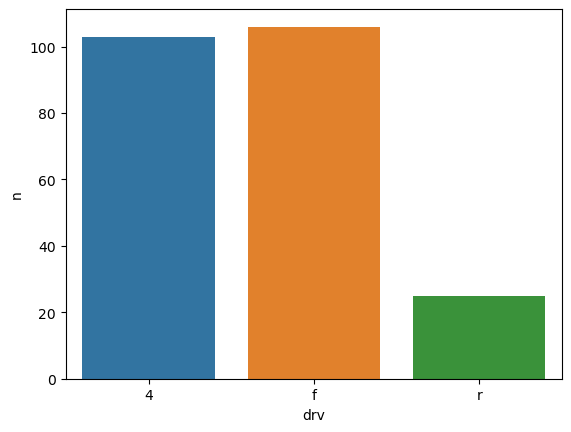

In [32]:
# 이건 빈도표를 만들고 막대그래프를 만듦
sns.barplot(data=df_mpg,x='drv',y='n')

<Axes: xlabel='drv', ylabel='count'>

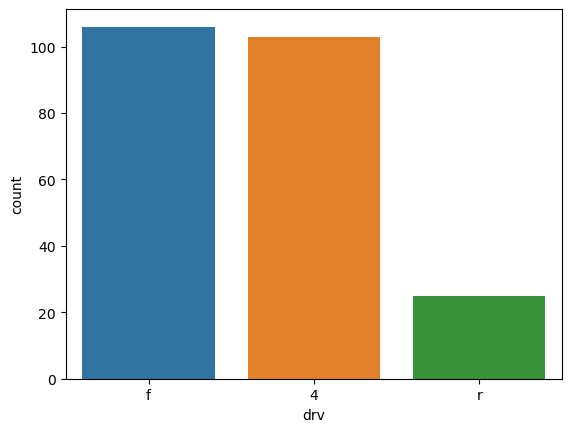

In [36]:
# 그리고 이건 빈도표를 생략하고 원자료로 바로 막대그래프 만듦
sns.countplot(data=mpg, x='drv')

In [39]:
# 출력해보면 이유를 알 수 있다
mpg['drv'].head(20)

0     f
1     f
2     f
3     f
4     f
5     f
6     f
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    r
19    r
Name: drv, dtype: object

In [40]:
# drv 를 빈도가 높은순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

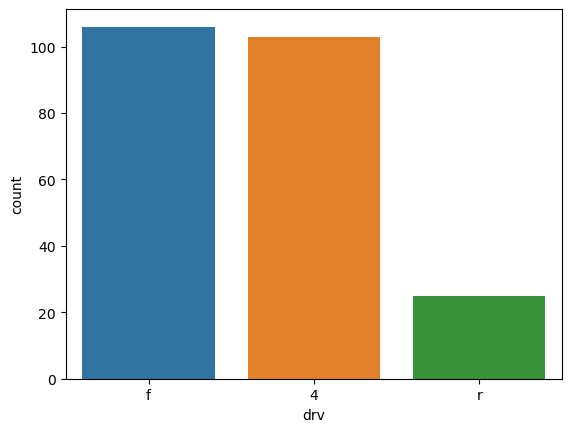

In [49]:
# drv 빈도가 높은순으로 막대 정렬
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().index);

<Axes: xlabel='manufacturer', ylabel='mean_cty'>

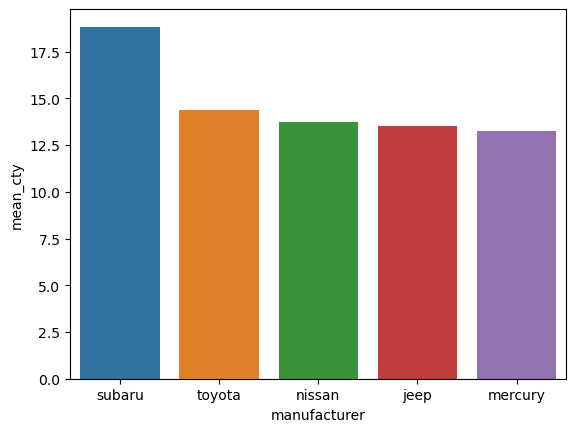

In [66]:
# 두 번째 혼자서 해보기 (HARD)
# Q1
m_mpg = mpg.query('category == "suv"')\
        [['manufacturer', 'cty']]\
        .groupby('manufacturer', as_index=False)\
        .agg(mean_cty = ('cty', 'mean'))\
        .sort_values('mean_cty', ascending=False)\
        .head()
sns.barplot(data=m_mpg, x='manufacturer', y='mean_cty')

<Axes: xlabel='category', ylabel='n'>

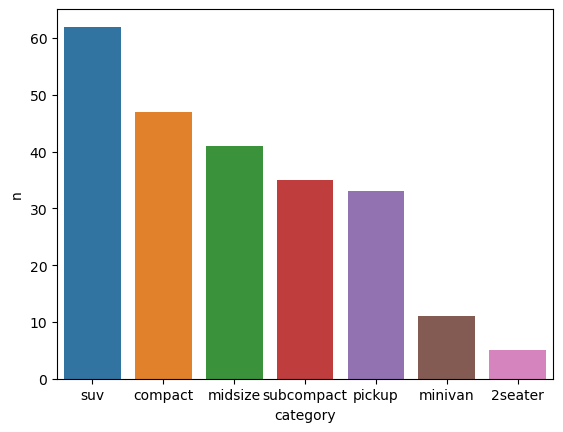

In [67]:
# Q2
m2_mpg = mpg.groupby('category', as_index=False)\
    .agg(n = ('category', 'count'))\
    .sort_values('n', ascending=False)
    
sns.barplot(data = m2_mpg, x='category', y='n')

In [72]:
# 시계열 그래프
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

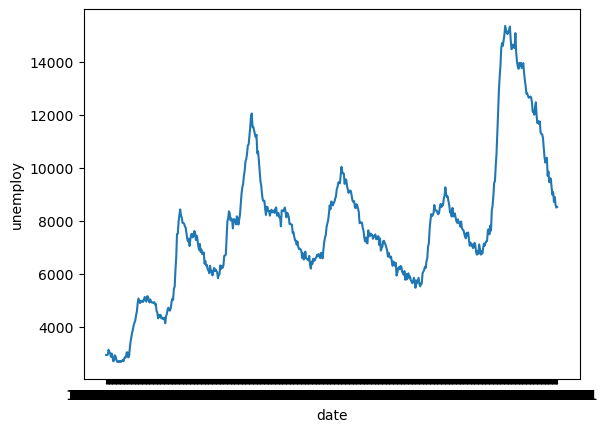

In [74]:
sns.lineplot(data = economics, x = 'date', y='unemploy')

In [76]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
# 변수 타입 확인
economics.info()

# 변수의 타입이 object 에서 datetime 으로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [78]:
economics[['date', 'date2']]
# 출력해보면 똑같이 보이지만

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [83]:
economics['date2'].dt.year
economics['date2'].dt.month
economics['date2'].dt.day
# date2 는 연,월,일 을 추출해서 사용 가능

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [84]:
# 위를 이용해서 연도 변수 만들기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

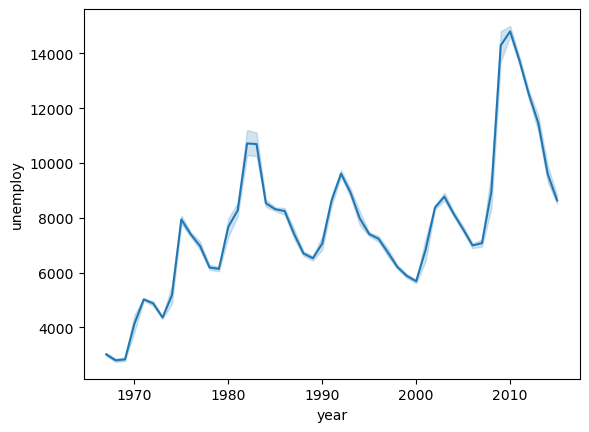

In [86]:
# x축, y축에 연도랑 무직자 표시
sns.lineplot(data=economics, x='year', y='unemploy')

C:\Users\User\AppData\Local\Temp\ipykernel_11552\3563959727.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics , x='year', y='unemploy', ci = None)


<Axes: xlabel='year', ylabel='unemploy'>

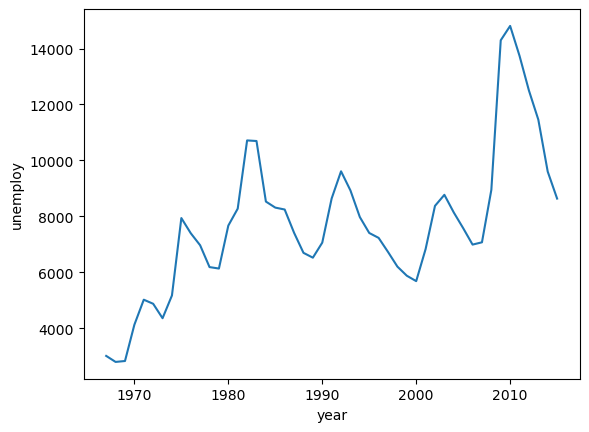

In [91]:
# 신뢰구간 (그래프 끝쪽에 희미하게 돼있는거) 제거
sns.lineplot(data=economics , x='year', y='unemploy', ci = None)
# ci = None

In [92]:
# 세 번째 혼자서 해보기 
# Q1

In [93]:
# Q2

<Axes: xlabel='drv', ylabel='hwy'>

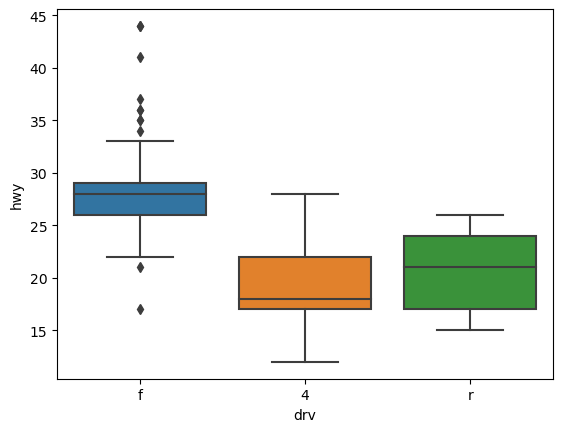

In [94]:
# 상자 그림 만들기
sns.boxplot(data = mpg, x='drv', y='hwy')